In [0]:
# !apt-get -qq install -y libsm6 libxext6

In [0]:
# !pip install -q -U opencv-python

Implementation of "Face detection using OpenCV and Python: A beginner's guide"
https://www.superdatascience.com/blogs/opencv-face-detection

In [3]:
#import required libraries
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
%matplotlib inline

cv2.cvtColor is an OpenCV function to convert images to different color spaces. It takes as input an image to transform, and a color space code (like cv2.COLOR_BGR2RGB) and returns the processed image.

Here we create a helper to convert images to RGB space for matplotlib

In [4]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

HAAR Cascade Classifier - simple task
1. load our input image
2. convert it to grayscale mode 
3. display it

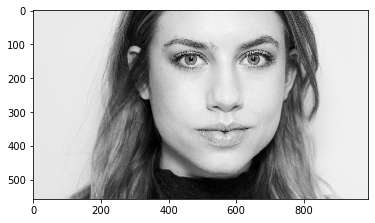

In [7]:
#load test image
test1 = cv2.imread('test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

#To display our image, I’ll use the plt.imshow(img, cmap) function of matplotlib.
plt.imshow(gray_img, cmap='gray')

In [13]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Faces found:  1


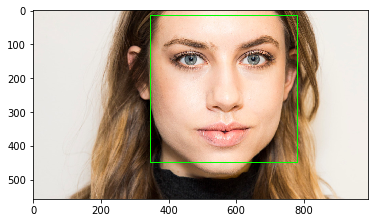

In [14]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

#go over list of faces and draw them as rectangles on original colored
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#convert image to RGB and show image
plt.imshow(convertToRGB(test1))

In [15]:
#Single function that do everything
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)       
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);   
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img_copy

In [18]:
test2 = cv2.imread('test1.jpg')
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

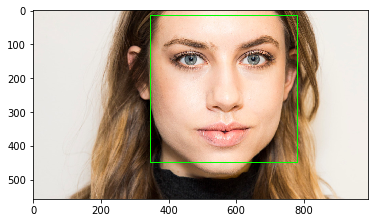

In [19]:
plt.imshow(convertToRGB(detect_faces(haar_face_cascade, test2)))